In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)

In [ ]:
df.shape

(102599, 26)

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [ ]:
df = df.drop_duplicates()

In [ ]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
if 'price' in df.columns:
    q_low = df['price'].quantile(0.01)
    q_high = df['price'].quantile(0.99)
    df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100094 entries, 0 to 100093
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              100094 non-null  int64         
 1   name                            100094 non-null  object        
 2   host_id                         100094 non-null  int64         
 3   host_identity_verified          100094 non-null  object        
 4   host_name                       100094 non-null  object        
 5   neighbourhood_group             100094 non-null  object        
 6   neighbourhood                   100094 non-null  object        
 7   lat                             100094 non-null  float64       
 8   long                            100094 non-null  float64       
 9   country                         100094 non-null  object        
 10  country_code                    100094 non-null  object 

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_identity_verified,0
host_name,0
neighbourhood_group,0
neighbourhood,0
lat,0
long,0
country,0


In [ ]:
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

    df['last_review'] = df['last_review'].fillna(pd.NaT)

    df['has_review'] = np.where(df['last_review'].notna(), 'Yes', 'No')

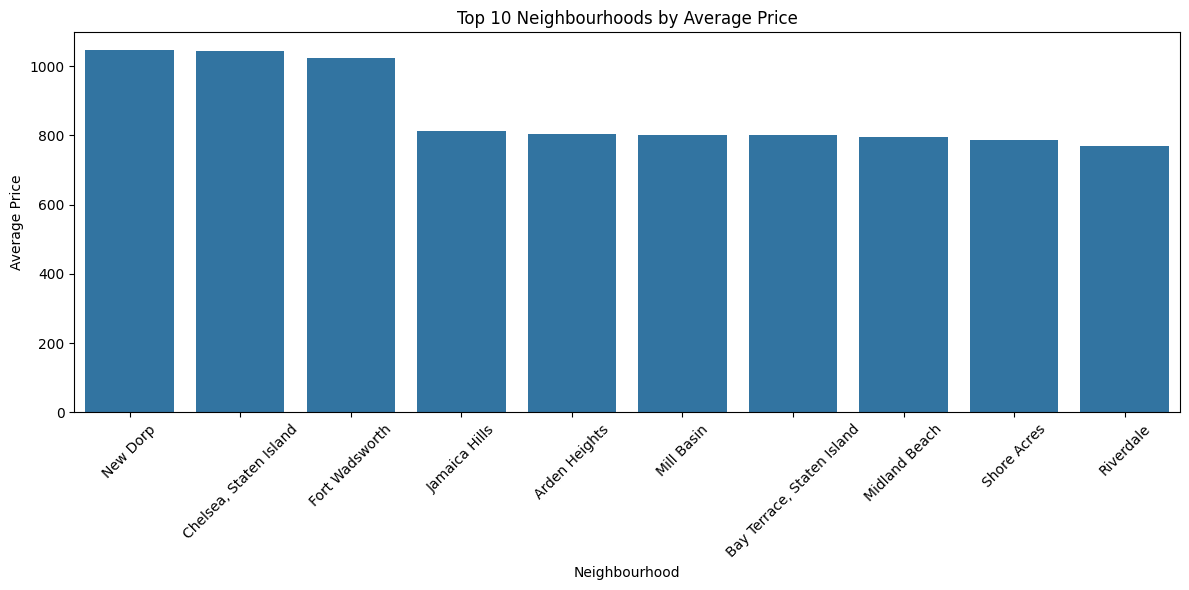

In [ ]:
if 'neighbourhood' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(12,6))
    avg_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
    sns.barplot(x=avg_price.index, y=avg_price.values)
    plt.title('Top 10 Neighbourhoods by Average Price')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

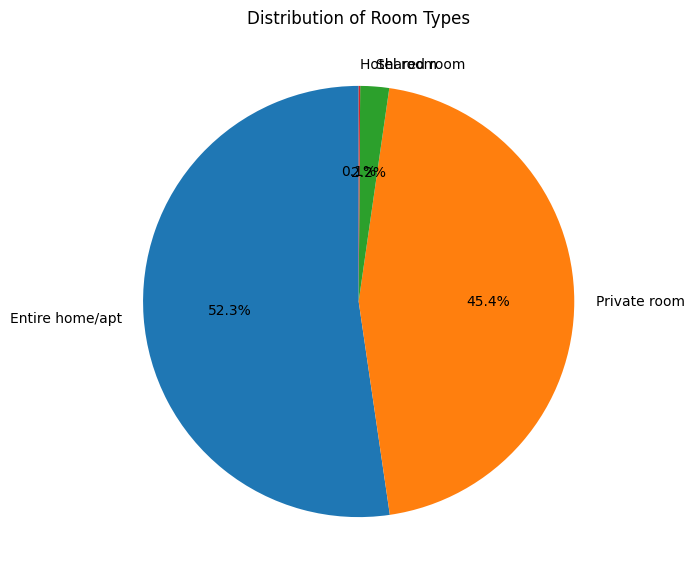

In [ ]:
if 'room_type' in df.columns:
    plt.figure(figsize=(7,7))
    room_counts = df['room_type'].value_counts()
    plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Room Types')
    plt.show()

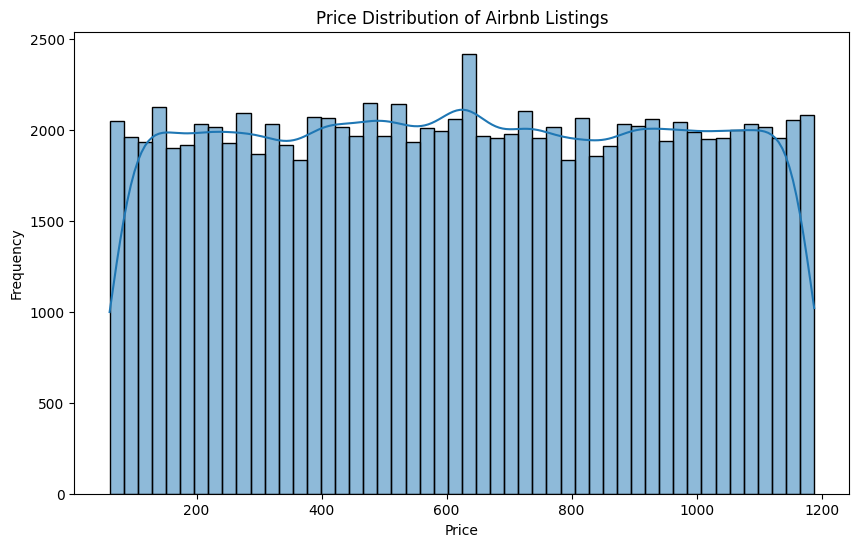

In [ ]:
if 'price' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title('Price Distribution of Airbnb Listings')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

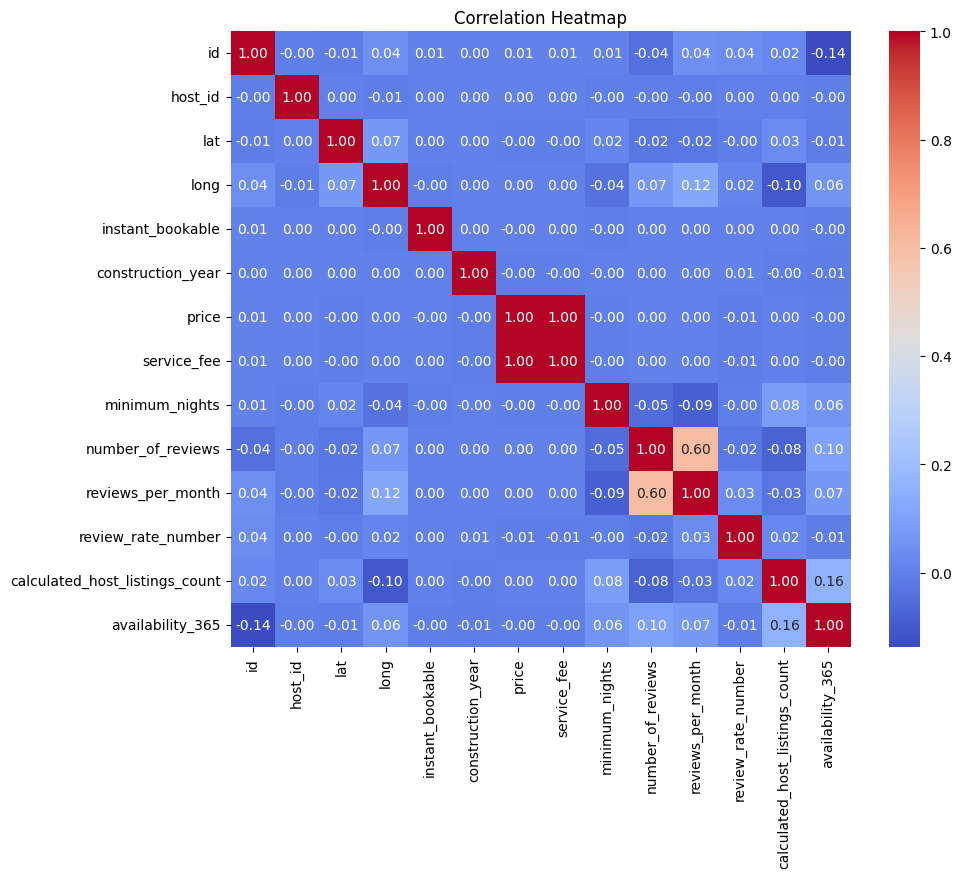

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

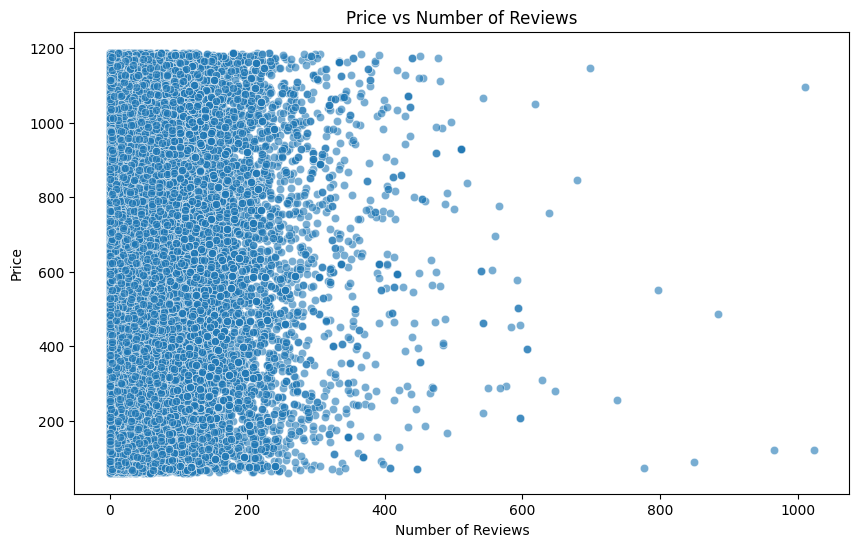

In [ ]:
if {'price', 'number_of_reviews'}.issubset(df.columns):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.6)
    plt.title('Price vs Number of Reviews')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price')
    plt.show()